This Jupyter notebook walks through some of the most common charting scripts. Should be able to copy and paste easily
- Create a generic data frame, with some random numbers and values
- Basic chart types: Line, dot, pie
- Minimum polishing 
- Pivots and Multi-line charts
- Histograms
- Subplots
- Multiple y-scales

This is a very useful diagram from https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py
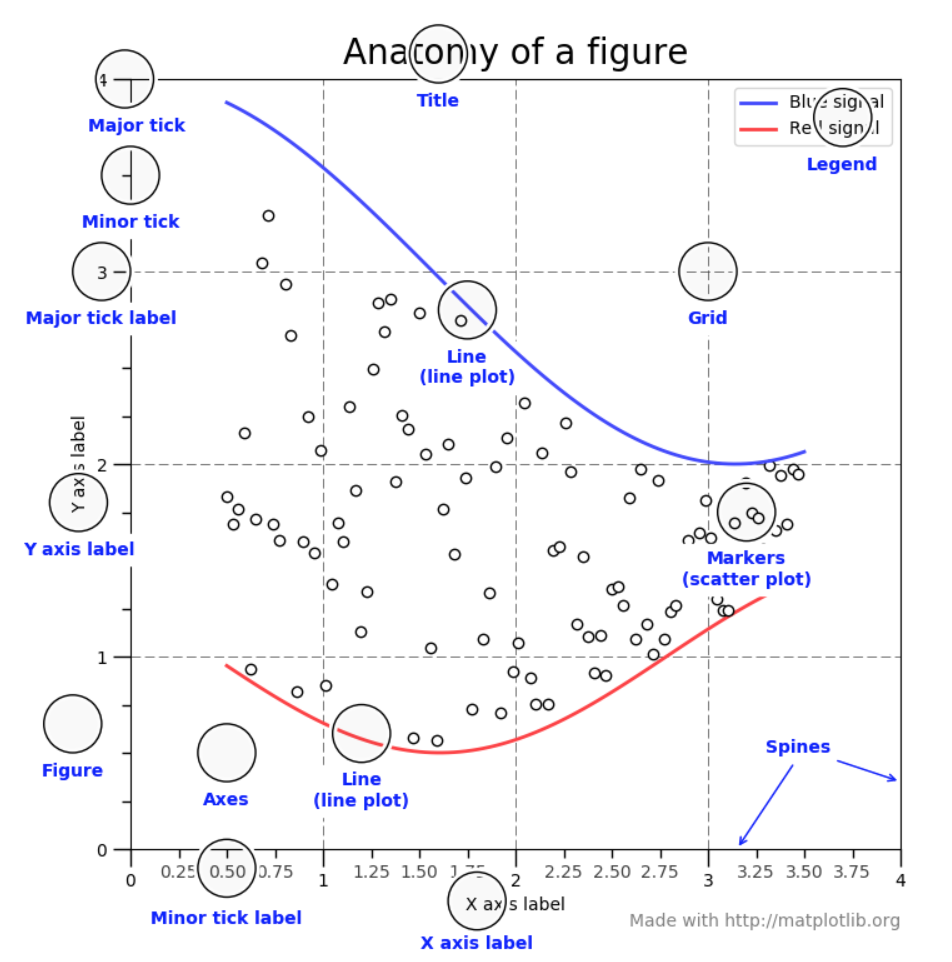

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Data Prep and some basic charts

In [2]:
#Create a data frame
rowIndex = np.arange(1,26) # e.g. 1, 2, 3, ... 25
colA = np.random.randint(101, size=25) # e.g. [ x, y, z... ], 25 random numbers between 0 and 100
colB = np.random.randint(101, size=25) 
df = pd.DataFrame(data={"ID":rowIndex, "Column A":colA, "Column B": colB})

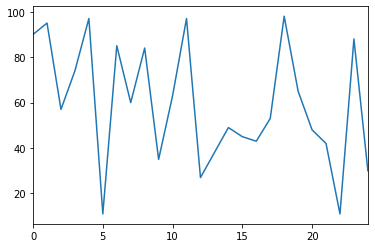

In [3]:
df["Column A"].plot()

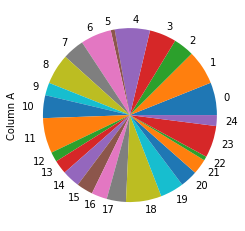

In [25]:
df["Column A"].plot(kind='pie')

In [3]:
df.head()

,ID,Column A,Column B
0,1,99,37
1,2,28,1
2,3,77,75
3,4,74,77
4,5,35,12


# 2. Minimum polishing

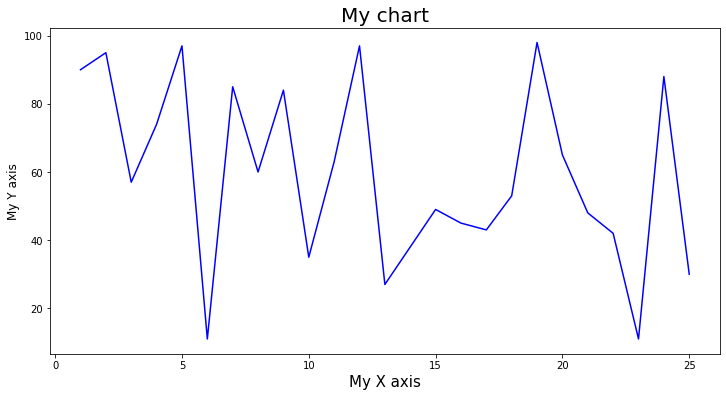

In [111]:
# Basic figure, with size and subtitles
fig = plt.figure(figsize=(12,6))

# Provide the X and Y values, a marker, a color, and the label:
plt.plot(df["ID"], df["Column A"], color='b', label="Column A")

# Labels
plt.title("My chart", fontsize=20)
plt.xlabel("My X axis", fontsize=15)
plt.ylabel("My Y axis", fontsize=12)

plt.show()

# 3. Pivots and Multi-line charts

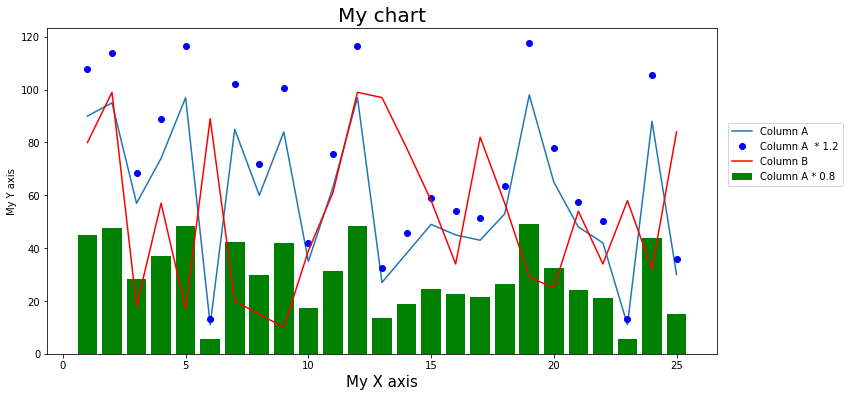

In [113]:
# Pivots and Multi-line charts
fig = plt.figure(figsize=(12,6))

plt.plot(df["ID"],df["Column A"], label="Column A") #x, y, no marker = default to line
plt.plot(df["ID"],df["Column A"] * 1.2, 'o', color='b', label="Column A  * 1.2") # x, y, marker
plt.bar(df["ID"],df["Column A"] * 0.5, color='g', label="Column A * 0.8") # x, y, marker
plt.plot(df["ID"],df["Column B"], color='r', label="Column B") # x, y, smaller dot

# Labels
plt.title("My chart", fontsize=20)
plt.xlabel("My X axis", fontsize=15)
plt.ylabel("My Y axis", fontsize=10)

#Legends
# Key here is that the lines above, needs to have the labels. That's what the legend uses to figure out what to put there.
# See what location means here https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html
# The bbox_to_anchor puts the legend within (0-1) or outside (1+) of the plot area (x,y)
plt.legend(loc=3, bbox_to_anchor=(1.01, 0.5))

plt.show()


# 4. Histograms

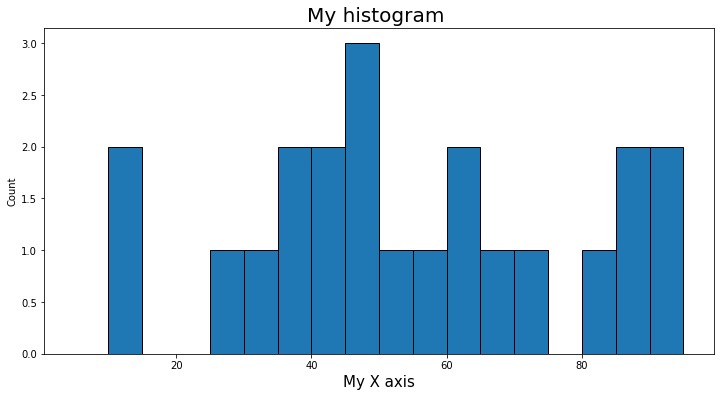

In [114]:
# Multiline with very different scales
fig = plt.figure(figsize=(12,6))

df["Column A"].plot(kind="hist", bins=np.arange(5, 100, 5), edgecolor = 'k') #bins of 5, 10, 15, ...

# Labels
plt.title("My histogram ", fontsize=20)
plt.xlabel("My X axis", fontsize=15)
plt.ylabel("Count", fontsize=10)

plt.show()

# 5. Subplots

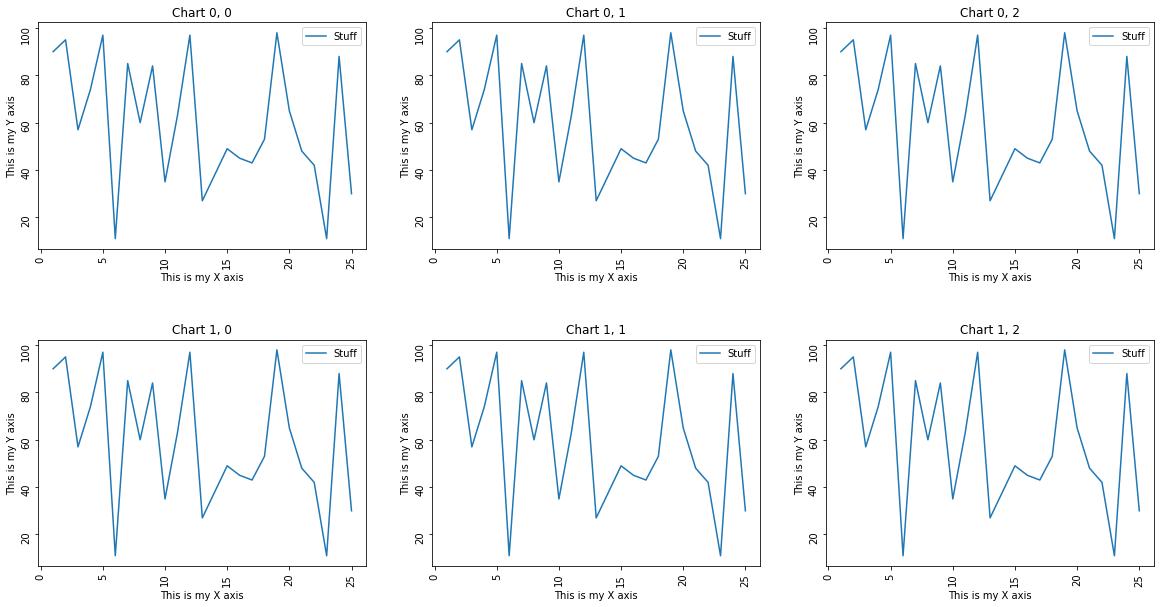

In [116]:
#Sometimes you want to plot a bunch of subplots
rowCount = 2
colCount = 3
fig, axs = plt.subplots(rowCount, colCount, figsize=(20,10))
fig.subplots_adjust(hspace=0.4,wspace=0.2)
for i in range(0,rowCount):
    for j in range(0,colCount):
        axs[i, j].plot(df["ID"],df["Column A"], label = "Stuff")
        axs[i, j].tick_params(labelrotation=90)
        axs[i, j].set_title("Chart " + str(i) + ", " + str(j))
        axs[i, j].set_xlabel("This is my X axis", fontsize=10)
        axs[i, j].set_ylabel("This is my Y axis", fontsize=10)
        axs[i, j].legend()

plt.show()

# 6. Multiple y scales

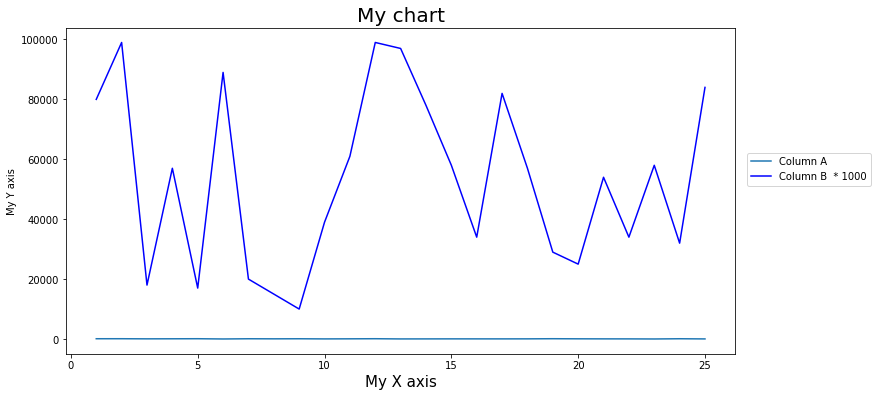

In [117]:
# Multiline with very different scales
fig = plt.figure(figsize=(12,6))

plt.plot(df["ID"],df["Column A"], label="Column A") #x, y, no marker = default to line
plt.plot(df["ID"],df["Column B"] * 1000, color='b', label="Column B  * 1000") # x, y, marker

# Labels
plt.title("My chart", fontsize=20)
plt.xlabel("My X axis", fontsize=15)
plt.ylabel("My Y axis", fontsize=10)

#Legends
plt.legend(loc=3, bbox_to_anchor=(1.01, 0.5))

#If you don't have this print it'll show some weird log
print()

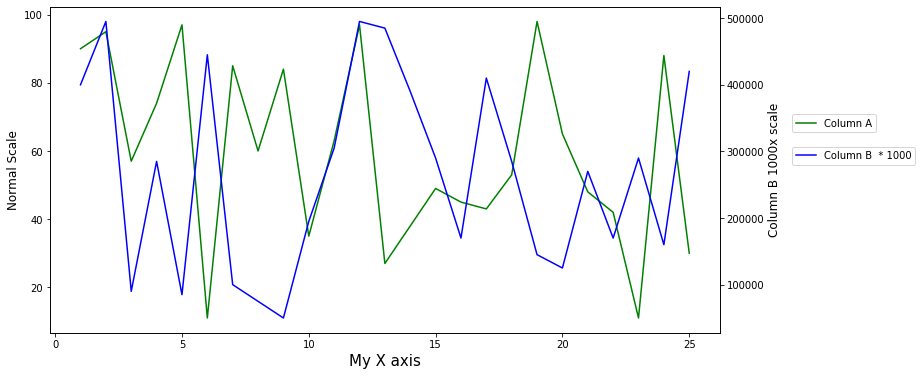

In [118]:
# Different y scales
fig, ax1 = plt.subplots(figsize=(12,6))

#Plot series one
ax1.set_xlabel('My X axis', fontsize=15)
ax1.set_ylabel('Normal Scale', fontsize=12)
ax1.plot(df["ID"],df["Column A"], color='g', label="Column A") #x, y, no marker = default to line
ax1.tick_params(axis='y')

#Get the second axes and plot
ax2 = ax1.twinx()  
ax2.set_ylabel('Column B 1000x scale', fontsize=12)  
ax2.plot(df["ID"],df["Column B"] * 5000, color='b', label="Column B  * 1000") # x, y, marker
ax2.tick_params(axis='y')

#Legends
ax1.legend(loc=3, bbox_to_anchor=(1.1, 0.6))
ax2.legend(loc=3, bbox_to_anchor=(1.1, 0.5))

plt.show()
print()